In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Chap 10. 비지도 학습 알고리즘
- 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주. 입력값에 대한 목표치가 주어지지 않는다

## 10-1 차원축소
- 높은 차원의 데이터는 계산비용이 높으며, 데이터의 노이즈가 있을 수 있다.
- Feature selection, feature extraction, clustering

### 주성분분석
- 수치형 변수의 공변성 잡아내기
- 다차원 데이터를 분산이 큰 방향에서부터 순서대로 축을 다시 잡는 방법
- 변수간 종속성이 클 수록 더 소수의 주성분으로 데이터 표현 가능
- 각 특징이 정규분포를 따른다는 가정이 있어, 왜곡된 분포를 가진 변수를 이용하면 적절하지 않다.
- 특징들의 척도가 상이할 경우 올바른 주성분 방향을 찾을 수 없어 변수변환 필요

[장단점]
- 고차원 데이터를 손실을 최소화하면서 효율적으로 축소
- 그래프의 두 축을 해석하기 쉽지 않으며, 비선형구조 반영 불가능

feature 13개, data 178개
고유값 요약: 
         eigenvalue       기여율     누적기여율
comp1     4.732437  0.361988  0.361988
comp2     2.511081  0.192075  0.554063
comp3     1.454242  0.111236  0.665300
comp4     0.924166  0.070690  0.735990
comp5     0.858049  0.065633  0.801623
comp6     0.645282  0.049358  0.850981
comp7     0.554141  0.042387  0.893368
comp8     0.350466  0.026807  0.920175
comp9     0.290512  0.022222  0.942397
comp10    0.252320  0.019300  0.961697
comp11    0.227064  0.017368  0.979066
comp12    0.169724  0.012982  0.992048
comp13    0.103962  0.007952  1.000000 



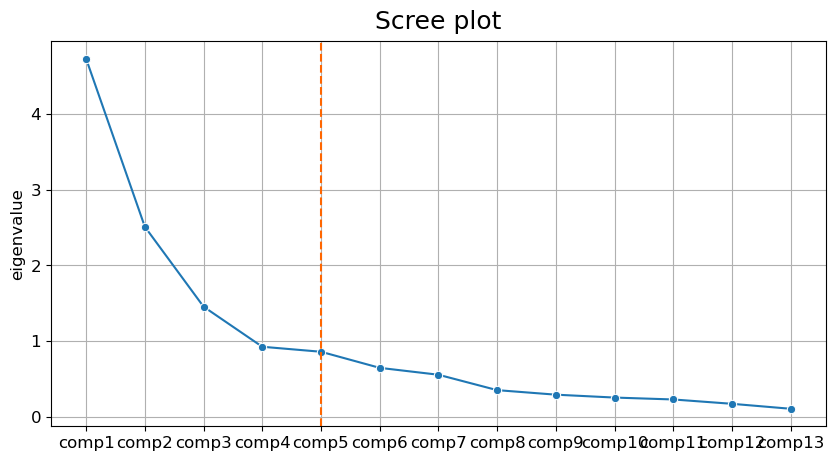

In [7]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

model = PCA(n_components=X.shape[1], svd_solver='auto')
model.fit(scaled_X)

e_value = pd.DataFrame({"eigenvalue":model.explained_variance_, '기여율':model.explained_variance_ratio_},
                      index=['comp%s' %i for i in range(1, X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print(f"고유값 요약: \n {e_value} \n")

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x=e_value.index, y='eigenvalue', marker='o', data=e_value, ax=ax)
ax.grid()
ax.set_title("Scree plot", fontsize=18, pad=9)
for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1
        break
plt.show()

고유벡터 요약:
         alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
comp1  0.144329   -0.245188 -0.002051          -0.239320   0.141992
comp2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634
comp3 -0.207383    0.089013  0.626224           0.612080   0.130757
comp4 -0.017856    0.536890 -0.214176           0.060859  -0.351797
comp5 -0.265664    0.035214 -0.143025           0.066103   0.727049 



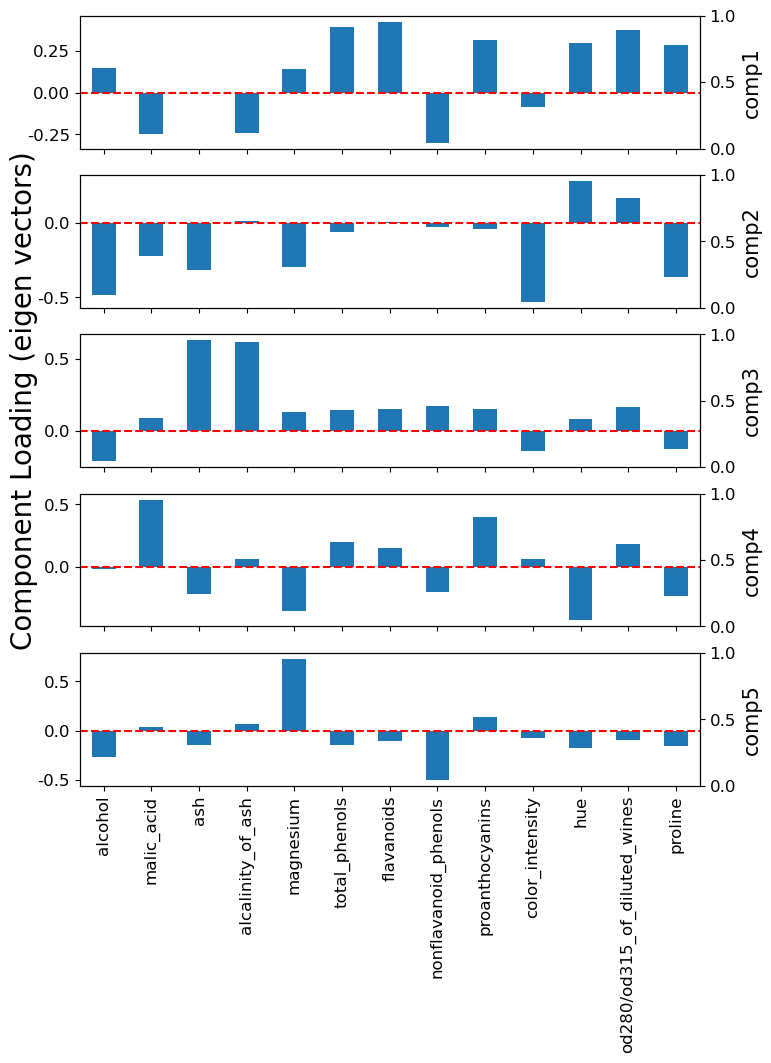

In [11]:
model = PCA(n_components=best_dim, svd_solver='auto')
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_X)

e_vector = pd.DataFrame(model.components_, index=['comp%s'%i for i in range(1, best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약:\n", e_vector.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    e_vector.iloc[i,:].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


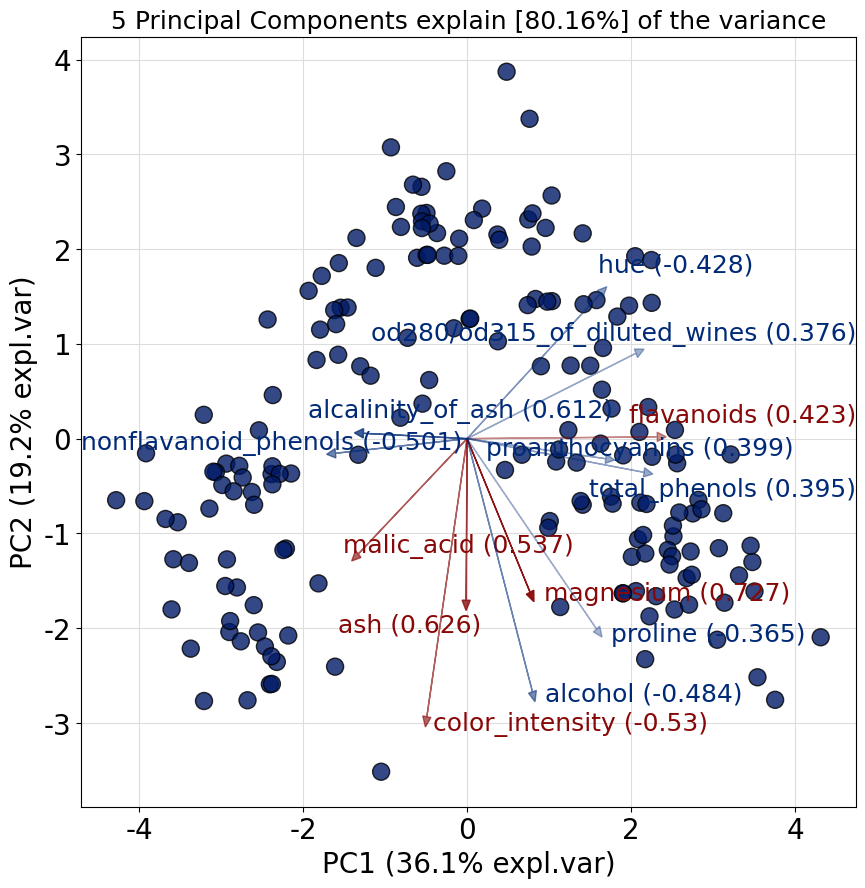

In [14]:
from pca import pca

model = pca(n_components=5)
model.fit_transform(scaled_X)
fig, ax = model.biplot(n_feat=scaled_X.shape[1], legend=False, figsize=(10, 10))
plt.show()
plt.close()

### 요인분석
- 변수들 간의 상관관계를 분석하여 공통 차원들을 통해 축약하는 통계기법
- 잠재변수에 대해 연결된 분산을 찾고 오차를 추가한 인자들의 선형 결합으로 관측된 변수 표현
- 잠재변수들은 기본적으로 대등한 관계
- 탐색 요인 분석 : 변수가 어느 요인에 부합될지에 대한 가설이 없을 때
- 확인 요인 분석 : 변수와 요인에 대한 특정한 가설을 토대로 요인 분석모델과 자료가 부합하는지 확인
- 변수 축소, 불필요한 변수 제거, 변수 특성 파악, 요인점수를 이용한 변수 생성

feature 13개, data 178개
잠재요인 요약: 
           alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
latent1  0.299731   -0.424489  0.143386          -0.387691   0.275096
latent2 -0.423886   -0.283977 -0.866066          -0.364116  -0.409356
latent3 -0.576480   -0.039512  0.368996           0.537425  -0.228729
latent4 -0.117865   -0.148264 -0.013634          -0.073661   0.668697
latent5 -0.194167    0.157465 -0.071648           0.239827   0.209583 



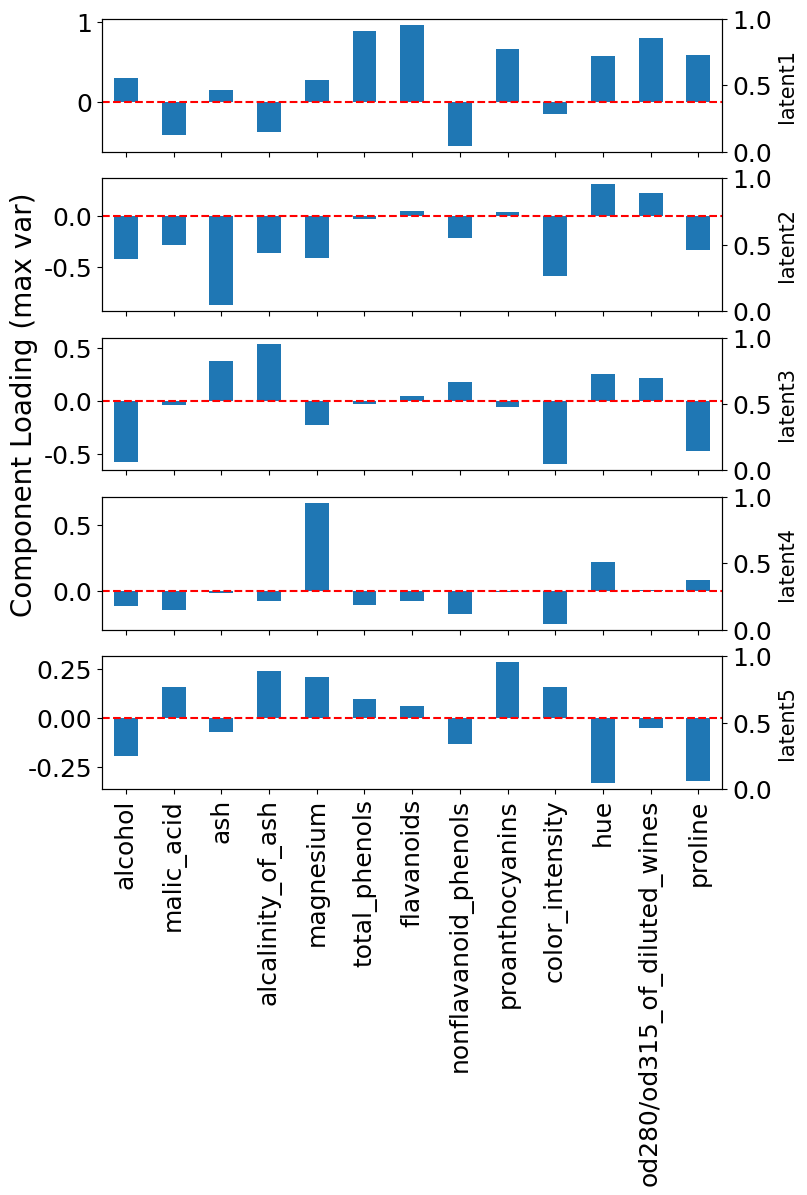

In [15]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

load = load_wine()
X = pd.DataFrame(load['data'], columns=load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

best_dim = 5

model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_X)
FA_result = model.transform(scaled_X)

max_var = pd.DataFrame(model.components_, index=['latent%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print(f"잠재요인 요약: \n {max_var.iloc[:, :5]} \n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([" " for i in range(len(max_var.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (max var)", fontsize=20)
plt.show()

### 독립성분 분석 (Independent component anlaysis)
- 다변량의 신호를 최대한 독립적인 추가 하부성분으로 분리하는 방법
- 잡음항이 포함되지 않아, 모델이 정확하려면 백색화 필요

feature 13개, data 178개
독립성분 요약: 
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
ind comp1 -0.024105   -0.005155 -0.007659           0.008957  -0.018438
ind comp2  0.009505   -0.029927 -0.021531          -0.032238  -0.000413
ind comp3 -0.006502    0.027985 -0.031585          -0.007412   0.004399
ind comp4  0.021521    0.015567 -0.000031          -0.006517  -0.063530
ind comp5  0.002840    0.006247 -0.025368          -0.018937  -0.011574 



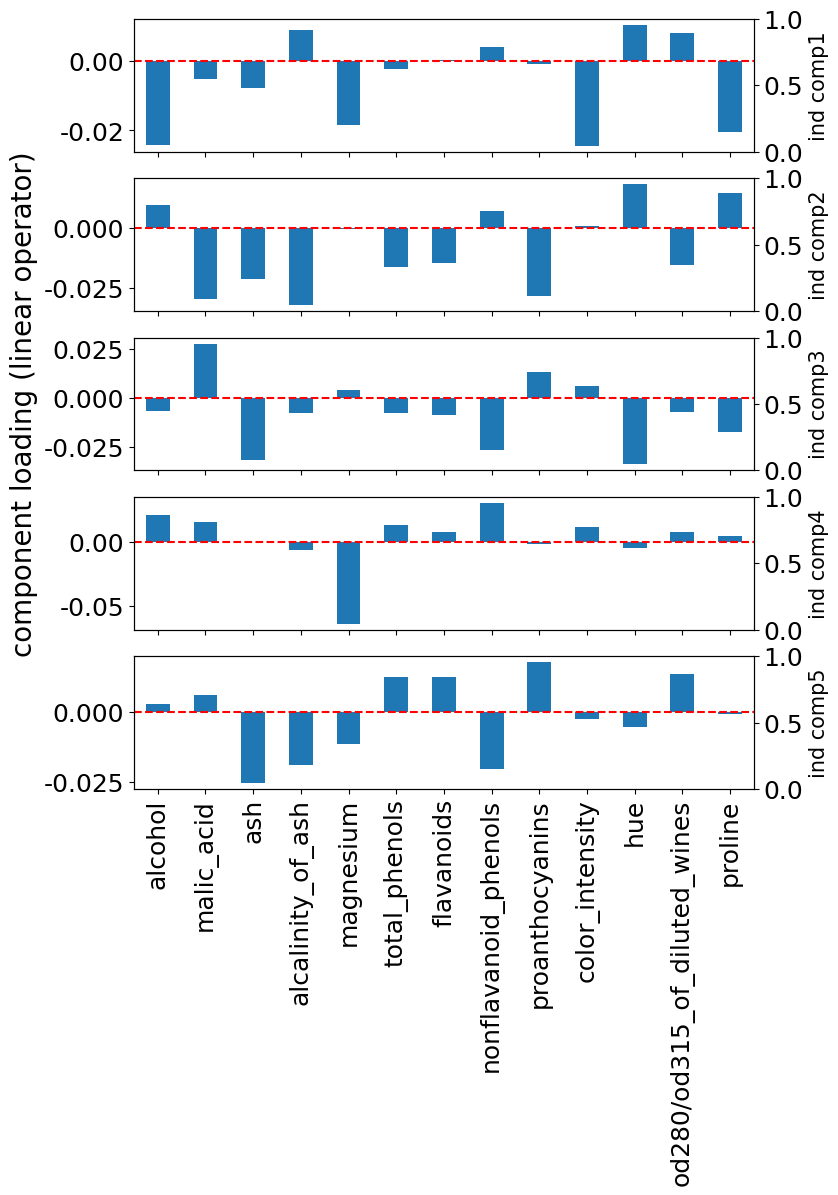

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten=True, fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

ind_comp = pd.DataFrame(model.components_, index=['ind comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print("독립성분 요약: \n", ind_comp.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    ind_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(ind_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(ind_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(ind_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(ind_comp.columns))))
ax.set_xticklabels(list(ind_comp.columns))
axes[round(best_dim/2)].set_ylabel("component loading (linear operator)", fontsize=20)
plt.show()

### 음수 미포함 행렬 분해(Non-negative matrix factorization)
- 데이터와 구성 요소가 음수가 아니라고 가정하에 진행하는 분해방법
    - 데이터 X를 음수를 포함하지 않는 두 개의 행렬 W,H로 분해하는데, X와 WH사이의 거리인 d를 최적화하면서 진행. 거리는 squared Frobenius norm으로 계산
- 벡터 표현은 구성요소를 빼지 않고 겹쳐서 덧셈 방식으로 얻는다.

feature 13개, data 178개
NMF 성분 요약: 
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
NMF comp1  0.533032    0.000000  0.231414           0.000000   0.276342
NMF comp2  0.251895    0.205227  0.103096           0.012536   0.000000
NMF comp3  0.557189    1.246465  0.504060           0.656570   0.123347
NMF comp4  0.000000    0.000000  1.081248           1.337276   0.945641
NMF comp5  0.075718    0.000000  0.341988           0.373311   0.000000 



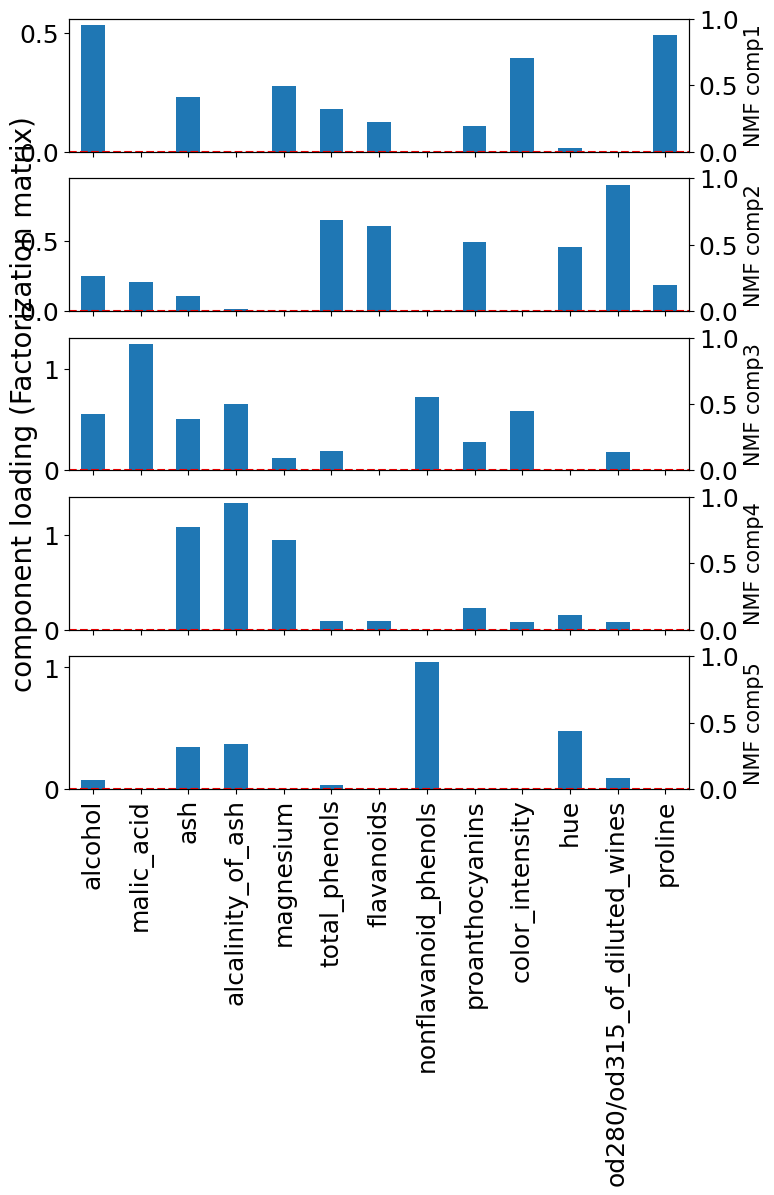

In [20]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

mm = MinMaxScaler()
scaled_X = pd.DataFrame(mm.fit_transform(X), columns=X.columns)

best_dim = 5
model = NMF(n_components=best_dim, init='random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X)

NMF_comp = pd.DataFrame(model.components_, index=['NMF comp%s' %i for i in range(1, best_dim+1)], columns=load['feature_names'])
print("NMF 성분 요약: \n", NMF_comp.iloc[:, :5], "\n")

fig, axes = plt.subplots(best_dim, 1, figsize=(8, 10))
for i, ax in enumerate(axes):
    NMF_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(NMF_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(NMF_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(NMF_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(NMF_comp.columns))))
ax.set_xticklabels(list(NMF_comp.columns))
axes[round(best_dim/2)].set_ylabel("component loading (Factorization matrix)", fontsize=20)
plt.show()

### 다차원척도법 (Multidimensional scaling)
- 원래 데이터의 고차원 공간에서의 거리를 잘 반영하는 저차원 데이터 탐색
- 관측 대상의 상대적 거리의 정확도를 높이기 위해 적합 정도를 stress값으로 나타내며, 반복 알고리즘을 통해 stress값을 최소로 하는 모형 탐색
    - stress는 작을수록 좋으며 0.1이하는 좋다고 봄
    - 실제 데이터 간 거리와 MDS로 추정된 거리 간의 차이 오차
- 계량적 MDS : 데이터가 구간척도나 비율척도인 경우, 개체들 간의 유클리드 거리 행렬을 계산하고 개체들 간의 비유사성을 공간상에 표현
- 비계략적 MDS : 데이터가 서열척도인 경우, 서열척도를 거리의 속성과 같도록 변환하여 거리를 생성한 후 적용

feature 13개, data 178개
차원 수 2 일 때, stress 0.2301572646914574
차원 수 3 일 때, stress 0.14421638408180104
차원 수 4 일 때, stress 0.10153475198496567
차원 수 5 일 때, stress 0.07167081747123694
차원 수 6 일 때, stress 0.05262312447954535


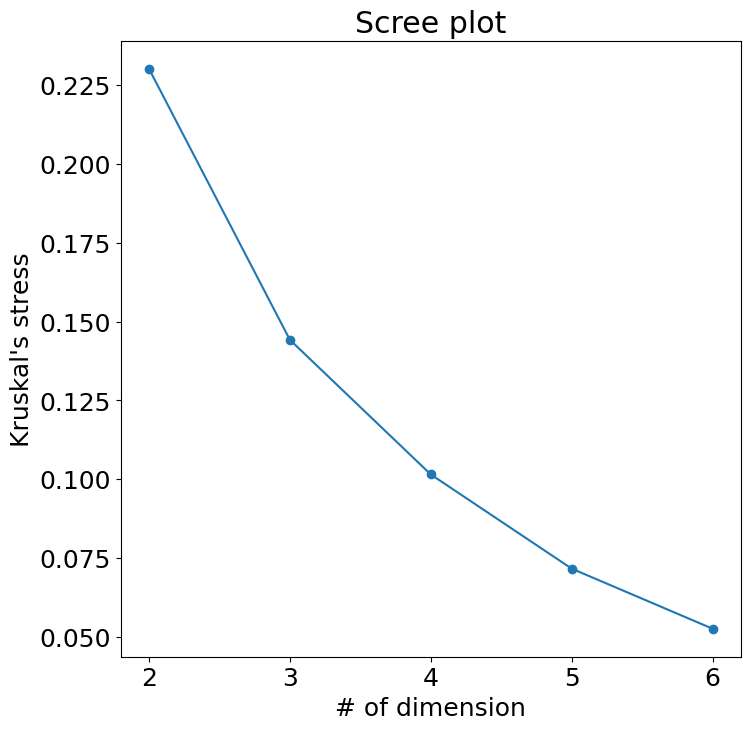

raw stress: 2122.211(~ 2121.620)
kruskal stress: 0.072(~ 0.072)


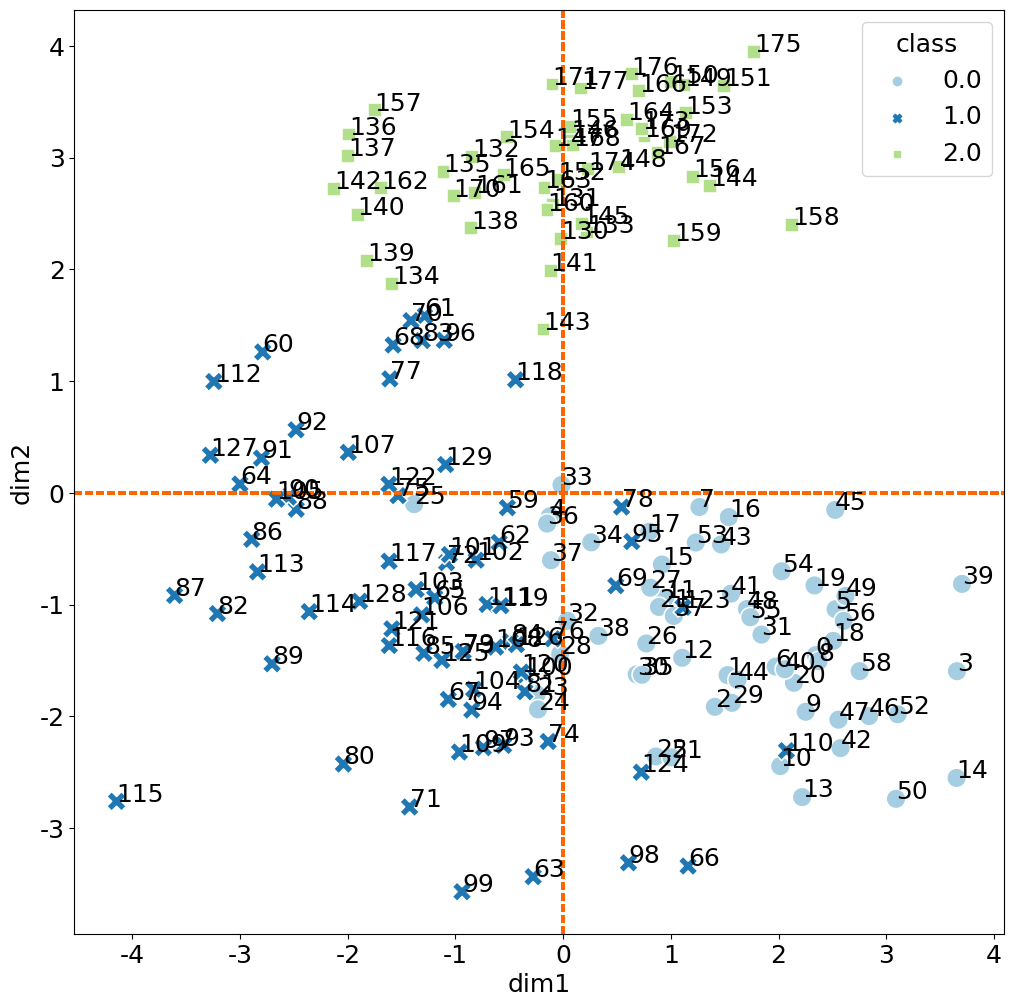

In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

load = load_wine()
X = pd.DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print(f"feature {X.shape[1]}개, data {X.shape[0]}개")

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

distances = pairwise_distances(scaled_X)

Slist = []
for i in range(2,7):
    mds = MDS(n_components=i, metric=True, random_state=0)
    mds.fit(scaled_X)
#     reduced_d = pairwise_distances(mds.embedding_) # 차원 축소된 데이터 간의 거리
#     distances = mds.dissimilarity_matrix_ # 데이터간 실제 거리
    sklearn_stress = mds.stress_ # 0.5*np.sum((distances-reduced_d)**2)
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(distances**2))) # stress-1
    Slist.append(kruskal_stress)
    print(f"차원 수 {i} 일 때, stress {kruskal_stress}")

# scree plotting
plt.rcParams['figure.figsize'] = (8,8)
plt.title("Scree plot")
plt.plot(list(range(2,7)), Slist, marker='o')
plt.xlabel("# of dimension")
plt.ylabel("Kruskal's stress")
plt.show()
    
best_dim = 5
model = MDS(n_components=best_dim, metric=True)
MDS_result = pd.DataFrame(model.fit_transform(scaled_X)) # model.embedding_과 동일
reduced_d = pairwise_distances(model.embedding_)

print(f"raw stress: {model.stress_:.3f}(~ {0.5*np.sum((distances-reduced_d)**2):.3f})")
print(f"kruskal stress: {np.sqrt(model.stress_ / (0.5*np.sum(distances**2))):.3f}(~ {np.sqrt(np.sum((distances-reduced_d)**2)/np.sum(distances**2)):.3f})")

reduced_data = pd.DataFrame(np.c_[MDS_result.values, y], columns=['dim1', 'dim2', 'dim3' ,'dim4', 'dim5', 'class'])
plt.rcParams['figure.figsize'] = (12, 12)
sns.scatterplot(x='dim1', y='dim2', data=reduced_data, style='class', style_order=[0,1,2], hue='class', palette='Paired', s=200)
for i, name in enumerate(MDS_result.index):
    plt.text(reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    plt.axhline(0, 0, ls='--', color='#ff6600')
    plt.axvline(0, 0, ls='--', color='#ff6600')
plt.show()

### 원본 데이터와 차원 축소 데이터로 적합한 모델 성능 비교

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_list = [scaled_X, PCA_result, FA_result, ICA_result, NMF_result, MDS_result]
title_list = ['original', 'PCA', 'FA', 'ICA', 'NMF' ,'MDS']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr = LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print(f"{title} data:")
    print(f"train score: {trainS}, test score: {testS}")

original data:
train score: 0.8903525326034907, test score: 0.9150699435498094
PCA data:
train score: 0.8270083369235681, test score: 0.8278646768734172
FA data:
train score: 0.8765409167951272, test score: 0.8804517023778357
ICA data:
train score: 0.827008336923568, test score: 0.8278646768734172
NMF data:
train score: 0.827361560220664, test score: 0.8449501307335814
MDS data:
train score: 0.8056392588779324, test score: 0.7917778047221573
